In [46]:
from google.colab import files
uploaded = files.upload()

Saving listingsBoston.csv to listingsBoston.csv


In [47]:
import pandas as pd
from sklearn.utils import resample
import io

listings = pd.read_csv(io.BytesIO(uploaded['listingsBoston.csv']))
print(listings)

                       id                                       listing_url  \
0                    3781                 https://www.airbnb.com/rooms/3781   
1                    5506                 https://www.airbnb.com/rooms/5506   
2                    6695                 https://www.airbnb.com/rooms/6695   
3                    8789                 https://www.airbnb.com/rooms/8789   
4                   10811                https://www.airbnb.com/rooms/10811   
...                   ...                                               ...   
4320  1181310640039457019  https://www.airbnb.com/rooms/1181310640039457019   
4321  1181310920532325010  https://www.airbnb.com/rooms/1181310920532325010   
4322  1181311064422167794  https://www.airbnb.com/rooms/1181311064422167794   
4323  1182535715185750063  https://www.airbnb.com/rooms/1182535715185750063   
4324  1183366210963015944  https://www.airbnb.com/rooms/1183366210963015944   

           scrape_id last_scraped       source  \
0

# Data Cleaning

Checking all the attributes in the daatset


In [48]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

Removing unnecessary attributes from the daatset

In [49]:
#Before Dropping
print(listings.shape)

listings = listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'calendar_updated','license','calendar_last_scraped'], axis=1)

#After dropping
print(listings.shape)

(4325, 75)
(4325, 59)


Price column has \$ symbol and cannot be processed as a numerical column. So, removing the \$ sign and converting it to float

In [50]:
# Ensure that the 'price' column is treated as a string first
listings['price'] = listings['price'].astype(str)

# Remove the $ symbol and commas using regex, then convert to numeric
listings['price'] = listings['price'].str.replace(r'[$,]', '', regex=True)

# Convert the cleaned 'price' column to a numeric type
listings['price'] = pd.to_numeric(listings['price'], errors='coerce')

# Check the result
print(listings['price'].head())
print(listings['price'].dtype)

0    125.0
1    139.0
2    179.0
3     92.0
4    130.0
Name: price, dtype: float64
float64


Checking if any of the numerical attributes have string or text data

In [51]:
# Convert the specified columns to numeric, coerce errors to NaN
cols_to_check = ['price','minimum_nights','maximum_nights','number_of_reviews','bedrooms', 'bathrooms', 'beds', 'accommodates',
                 'availability_30', 'availability_365', 'number_of_reviews_ltm','review_scores_rating']

# Function to check if values are non-numeric
def count_non_numeric(series):
    # This will return True for non-numeric values (strings or text)
    return series.apply(pd.to_numeric, errors='coerce').isna().sum()

# Apply the function to each column and get the count of non-numeric rows per column
non_numeric_counts = listings[cols_to_check].apply(count_non_numeric)

# Output the result
print("Number of rows with non-numeric values for each column:")
print(non_numeric_counts)



Number of rows with non-numeric values for each column:
price                    782
minimum_nights             0
maximum_nights             0
number_of_reviews          0
bedrooms                 210
bathrooms                782
beds                     804
accommodates               0
availability_30            0
availability_365           0
number_of_reviews_ltm      0
review_scores_rating     999
dtype: int64


Cleaning the text attributes room_type

In [52]:
# Remove leading/trailing spaces
listings['room_type'] = listings['room_type'].str.strip()

# Standardize text to lowercase
listings['room_type'] = listings['room_type'].str.lower()


Checking for missing values in the text attributes room_type and neighbourhood_cleansed

In [53]:
import pandas as pd

# Specify the columns to check for missing values
columns_to_check = ['room_type', 'neighbourhood_cleansed']

# Get the count of missing values for the specified columns
missing_values = listings[columns_to_check].isnull().sum()

# Display the number of missing values for these columns
print(missing_values)


room_type                 0
neighbourhood_cleansed    0
dtype: int64


Converting the amenities in each row into a numerical attribute in order to be used for further analysis.

In [54]:
# Function to clean and count the number of amenities in each record
def count_amenities(amenities_str):
    # Decode special characters and remove unnecessary characters like quotes, square brackets, etc.
    cleaned_amenities_str = amenities_str.encode('utf-8').decode('unicode_escape').strip('[]').replace('"', '')

    # Split the cleaned string into a list of amenities
    amenities_list = cleaned_amenities_str.split(', ')

    # Return the count of amenities
    return len(amenities_list)

# Apply the function to each record in the 'amenities' column
listings['amenities_count'] = listings['amenities'].apply(lambda x: count_amenities(x))

# Display the updated DataFrame with the new column
print(listings[['amenities', 'amenities_count']])

                                              amenities  amenities_count
0     ["Central air conditioning", "Free street park...               28
1     ["Fire extinguisher", "Free street parking", "...               29
2     ["Fire extinguisher", "Free street parking", "...               29
3     ["Fire extinguisher", "Bed linens", "Long term...               33
4     ["Fire extinguisher", "Bed linens", "Long term...               22
...                                                 ...              ...
4320  ["Mini fridge", "Fire extinguisher", "Bed line...               27
4321  ["Mini fridge", "Fire extinguisher", "Bed line...               25
4322  ["Mini fridge", "Fire extinguisher", "Bed line...               26
4323  ["Laundromat nearby", "Fire extinguisher", "Di...               47
4324  ["Smoke alarm", "Dedicated workspace", "First ...               13

[4325 rows x 2 columns]


# Task 1: Descriptive Statistics

Calculate summary statistics for numerical features such as `price`,
`minimum_nights`, `maximum_nights`, `number_of_reviews`, and
`review_scores_rating`. Understand the central tendency, dispersion, and
distribution of these variables.

In [55]:
# List of numerical features to analyze
numerical_features = ['price','minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating']

# Additional features for analysis
additional_numerical_features = ['accommodates','availability_30', 'availability_365', 'number_of_reviews_ltm']

Removing null values from the required numerical features

In [56]:
# Convert columns to numeric, invalid parsing will be set as NaN
listings[numerical_features] = listings[numerical_features].apply(pd.to_numeric, errors='coerce')

# Drop rows that have NaN in any of the specified columns (i.e., non-numeric values)
listings_1 = listings.dropna(subset=numerical_features)

# Check the DataFrame to ensure non-numeric values have been removed
print(listings_1)

# Verify that all specified columns are numerical
print(listings_1[numerical_features].dtypes)

                       id                                              name  \
0                    3781                         HARBORSIDE-Walk to subway   
1                    5506    ** Fort Hill Inn Private! Minutes to center!**   
2                    6695     Fort Hill Inn *Sunny* 1 bedroom, condo duplex   
3                    8789               Curved Glass Studio/1bd facing Park   
4                   10811  Back Bay Apt Studio-3 blocks to Pru center & "T"   
...                   ...                                               ...   
4286  1175344947100869764               Huge Studio in Downtown Boston 1409   
4292  1176861035408746030          Cozy Boston studio with separate bedroom   
4293  1177103248225483462    Stylish studio with room divider near downtown   
4296  1177619455488589855                        Luxury South End 1 Bedroom   
4301  1178933965841931292   Best Location, 1 bedroom Apartment, Beacon Hill   

                                            descrip

Calculating the summary statistics for the required numerical values

In [57]:
# Calculate summary statistics for the numerical features
summary_statistics = listings_1[numerical_features].describe()

# Display the summary statistics
print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
             price  minimum_nights  maximum_nights  number_of_reviews  \
count  2774.000000     2774.000000     2774.000000        2774.000000   
mean    232.056957       16.556957      539.816510          65.873828   
std     203.032961       26.234775      420.881163         106.297794   
min      25.000000        1.000000        3.000000           1.000000   
25%     112.000000        1.000000      360.000000           6.000000   
50%     190.000000        2.000000      365.000000          22.000000   
75%     284.000000       29.000000     1125.000000          82.000000   
max    4786.000000      365.000000     1125.000000         994.000000   

       review_scores_rating  
count           2774.000000  
mean               4.717909  
std                0.432748  
min                1.000000  
25%                4.660000  
50%                4.830000  
75%                4.970000  
max                5.000000  


Removing null values from the additional numerical features

In [58]:
# Convert columns to numeric, invalid parsing will be set as NaN
listings[additional_numerical_features] = listings[additional_numerical_features].apply(pd.to_numeric, errors='coerce')

# Drop rows that have NaN in any of the specified columns (i.e., non-numeric values)
listings_2 = listings.dropna(subset=additional_numerical_features)

# Check the DataFrame to ensure non-numeric values have been removed
print(listings_2)

# Verify that all specified columns are numerical
print(listings_2[additional_numerical_features].dtypes)

                       id                                              name  \
0                    3781                         HARBORSIDE-Walk to subway   
1                    5506    ** Fort Hill Inn Private! Minutes to center!**   
2                    6695     Fort Hill Inn *Sunny* 1 bedroom, condo duplex   
3                    8789               Curved Glass Studio/1bd facing Park   
4                   10811  Back Bay Apt Studio-3 blocks to Pru center & "T"   
...                   ...                                               ...   
4320  1181310640039457019        The Chester: Modern Luxury, Historic Charm   
4321  1181310920532325010         The Chester:  Urban Luxury, Modern Design   
4322  1181311064422167794     The Chester: Modern, Cool, Heart Of South End   
4323  1182535715185750063                                Luxury one bedroom   
4324  1183366210963015944       Large 4 Bedroom apartments, 2RD FL/Brighton   

                                            descrip

Calculating the summary statistics for the additional numerical features

In [59]:
# Calculate summary statistics for the numerical features
summary_statistics = listings_2[additional_numerical_features].describe()

# Display the summary statistics
print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
       accommodates  availability_30  availability_365  number_of_reviews_ltm
count   4325.000000      4325.000000       4325.000000            4325.000000
mean       3.258728        10.130173        191.822197              11.560462
std        2.345380        10.698757        125.982783              19.785549
min        1.000000         0.000000          0.000000               0.000000
25%        2.000000         0.000000         78.000000               0.000000
50%        2.000000         6.000000        200.000000               2.000000
75%        4.000000        20.000000        311.000000              15.000000
max       16.000000        30.000000        365.000000             221.000000


Calculating the values variance, skewness, kurtosis for understanding the central tendency, dispersion

In [60]:
# Calculate variance
variance_values1 = listings_1[numerical_features].var()
variance_values2 = listings_2[additional_numerical_features].var()
print("\nVariance Values:")
print(variance_values1)
print(variance_values2)

# Calculate skewness
skewness_values1 = listings_1[numerical_features].skew()
skewness_values2 = listings_2[additional_numerical_features].skew()
print("\nSkewness Values:")
print(skewness_values1)
print(skewness_values2)

# Calculate kurtosis
kurtosis_values1 = listings_1[numerical_features].kurt()
kurtosis_values2 = listings_2[additional_numerical_features].kurt()
print("\nKurtosis Values:")
print(kurtosis_values1)
print(kurtosis_values2)


Variance Values:
price                    41222.383340
minimum_nights             688.263433
maximum_nights          177140.953337
number_of_reviews        11299.221003
review_scores_rating         0.187271
dtype: float64
accommodates                 5.500806
availability_30            114.463393
availability_365         15871.661487
number_of_reviews_ltm      391.467955
dtype: float64

Skewness Values:
price                   5.987090
minimum_nights          3.400792
maximum_nights          0.456073
number_of_reviews       3.310953
review_scores_rating   -4.629216
dtype: float64
accommodates             2.195010
availability_30          0.647494
availability_365        -0.172350
number_of_reviews_ltm    2.824941
dtype: float64

Kurtosis Values:
price                   97.841231
minimum_nights          22.242211
maximum_nights          -1.385313
number_of_reviews       15.161719
review_scores_rating    30.726622
dtype: float64
accommodates              6.646466
availability_30        

# 2. Distribution Analysis

Plot histograms or density plots for key numerical features like price,minimum_nights, and review_scores_rating. Analyze the distribution of these features to identify any skewness or outliers.

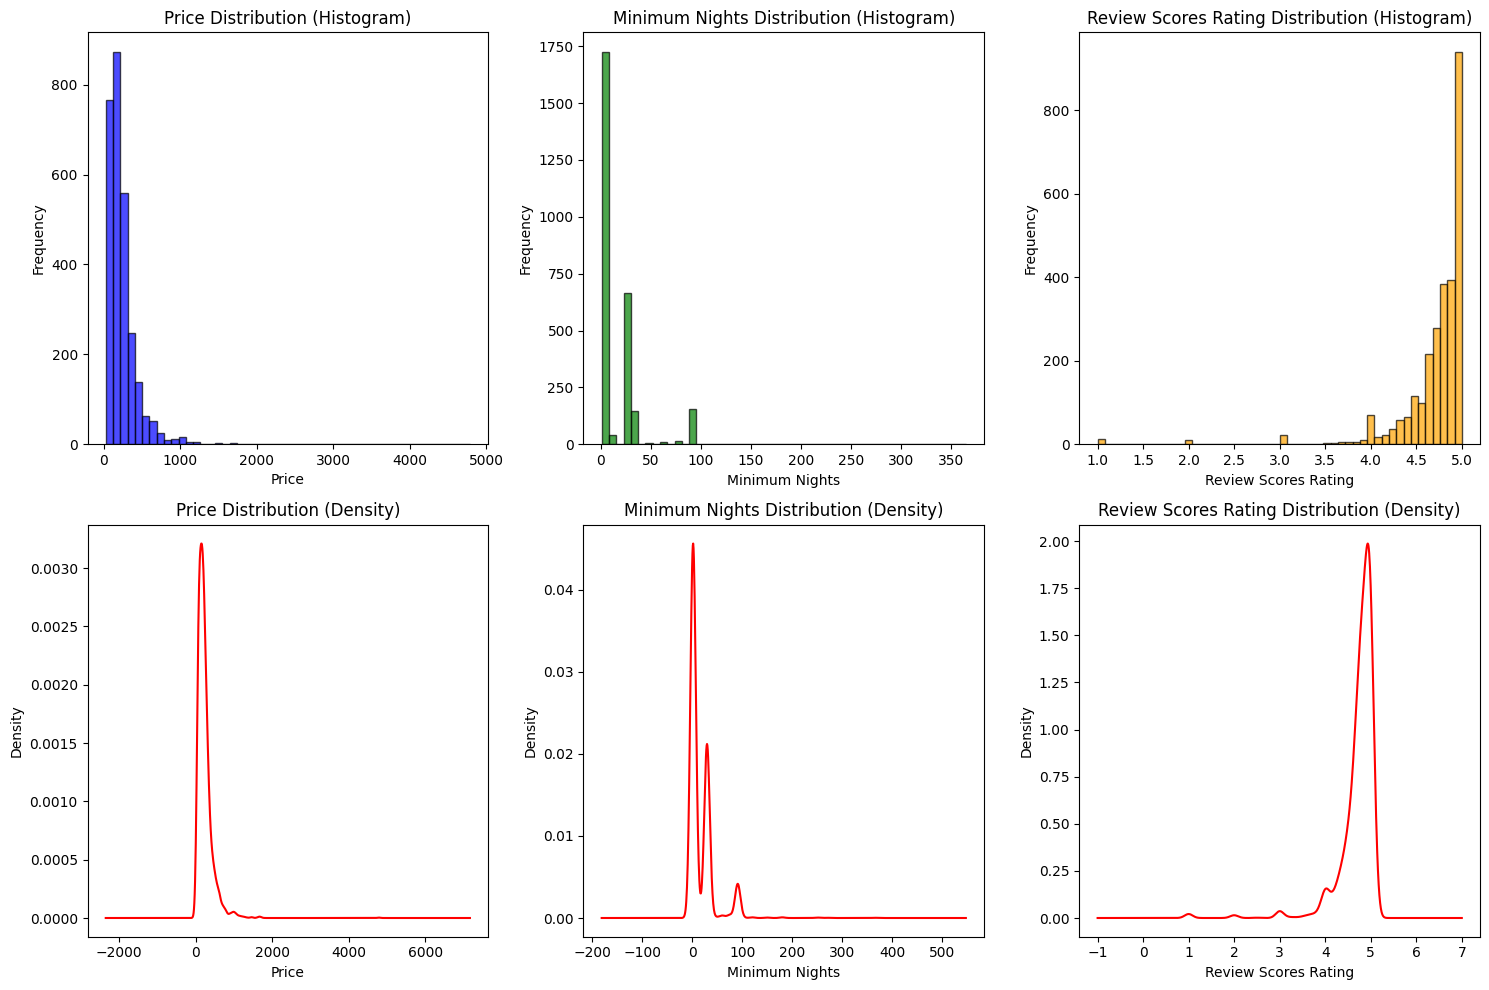

In [61]:
import matplotlib.pyplot as plt

# Plot histograms and density plots for key numerical features
plt.figure(figsize=(15, 10))

# Price histogram
plt.subplot(2, 3, 1)
plt.hist(listings_1['price'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Price density plot
plt.subplot(2, 3, 4)
listings_1['price'].plot(kind='kde', color='red')
plt.title('Price Distribution (Density)')
plt.xlabel('Price')
plt.ylabel('Density')

# Minimum nights histogram
plt.subplot(2, 3, 2)
plt.hist(listings_1['minimum_nights'], bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('Minimum Nights Distribution (Histogram)')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

# Minimum nights density plot
plt.subplot(2, 3, 5)
listings_1['minimum_nights'].plot(kind='kde', color='red')
plt.title('Minimum Nights Distribution (Density)')
plt.xlabel('Minimum Nights')
plt.ylabel('Density')

# Review scores rating histogram
plt.subplot(2, 3, 3)
plt.hist(listings_1['review_scores_rating'].dropna(), bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Review Scores Rating Distribution (Histogram)')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')

# Review scores rating density plot
plt.subplot(2, 3, 6)
listings_1['review_scores_rating'].dropna().plot(kind='kde', color='red')
plt.title('Review Scores Rating Distribution (Density)')
plt.xlabel('Review Scores Rating')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()

# 3. Correlation Analysis

Create a correlation matrix to explore relationships between numerical variables such as price, number_of_reviews, availability_365, and review_scores_rating. Identify any strong correlations that might be useful for predictive modeling or further investigation.

Plotting correlation matrix and heatmap for the required attributes

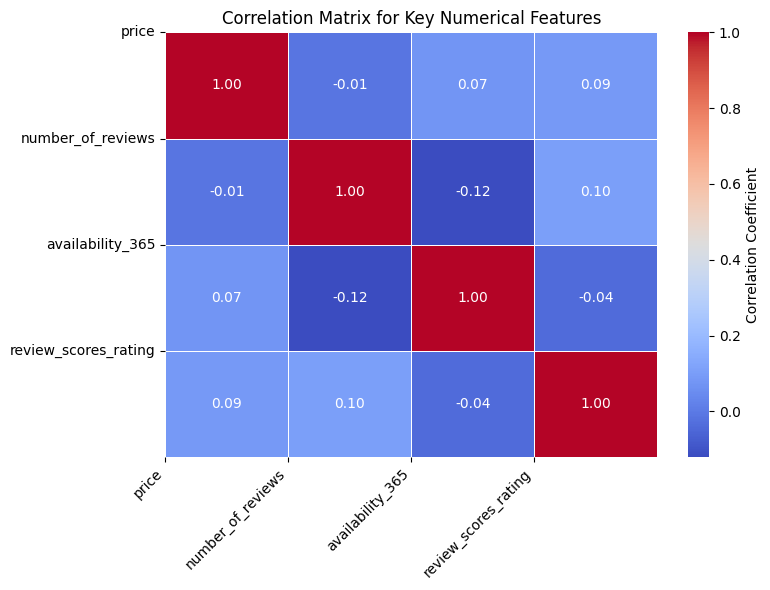

,price,number_of_reviews,availability_365,review_scores_rating
price,1.000000,-0.012124,0.072772,0.088569
number_of_reviews,-0.012124,1.000000,-0.121182,0.102351
availability_365,0.072772,-0.121182,1.000000,-0.039902
review_scores_rating,0.088569,0.102351,-0.039902,1.000000


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#List of columns
correlation_columns = ['price', 'number_of_reviews', 'availability_365', 'review_scores_rating']

# Convert columns to numeric, invalid parsing will be set as NaN
listings[correlation_columns] = listings[correlation_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows that have NaN in any of the specified columns
listings_3 = listings_1.dropna(subset=correlation_columns)

# Creating the correlation matrix
correlation_matrix = listings_3[correlation_columns].corr()

# Plotting the correlation matrix using a heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})

# Formatting the heatmap
plt.xticks(range(len(correlation_columns)), correlation_columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_columns)), correlation_columns)
plt.title('Correlation Matrix for Key Numerical Features')

# Show the plot
plt.tight_layout()
plt.show()

# Displaying the correlation matrix
correlation_matrix

Plotting correlation matrix and heatmap for additional attributes

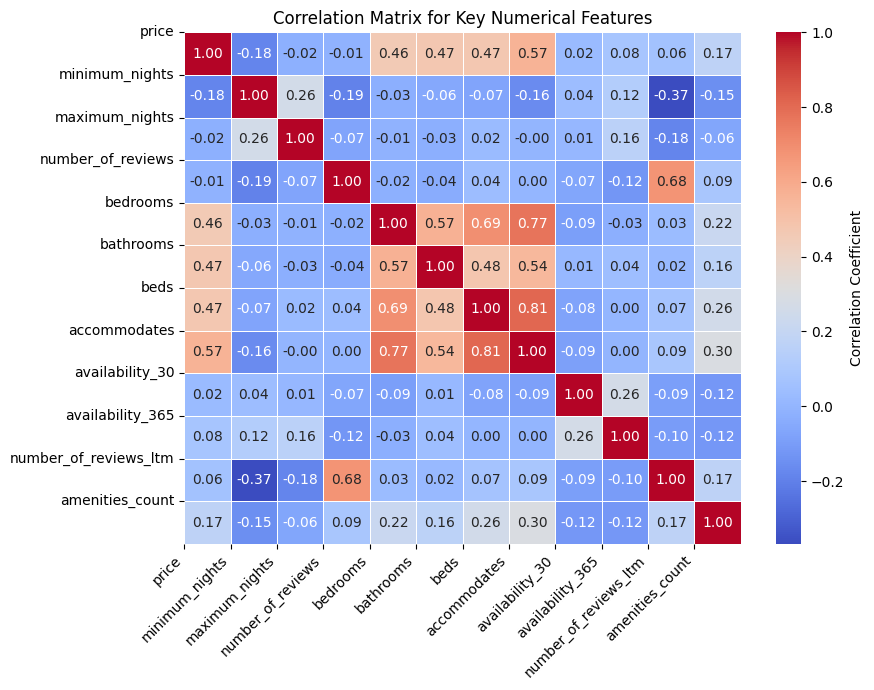

,price,minimum_nights,maximum_nights,number_of_reviews,bedrooms,bathrooms,beds,accommodates,availability_30,availability_365,number_of_reviews_ltm,amenities_count
price,1.000000,-0.182724,-0.024558,-0.011389,0.459275,0.473013,0.473033,0.565313,0.023132,0.075780,0.063711,0.168389
minimum_nights,-0.182724,1.000000,0.260937,-0.193912,-0.029112,-0.056926,-0.073671,-0.160607,0.037951,0.124627,-0.368127,-0.152794
maximum_nights,-0.024558,0.260937,1.000000,-0.069877,-0.011508,-0.029384,0.024230,-0.002287,0.009379,0.159936,-0.184690,-0.064230
number_of_reviews,-0.011389,-0.193912,-0.069877,1.000000,-0.022455,-0.038147,0.037638,0.000854,-0.068148,-0.124130,0.676651,0.085034
bedrooms,0.459275,-0.029112,-0.011508,-0.022455,1.000000,0.572273,0.691546,0.772395,-0.092243,-0.031137,0.028829,0.219373
bathrooms,0.473013,-0.056926,-0.029384,-0.038147,0.572273,1.000000,0.479956,0.540758,0.013486,0.039116,0.016784,0.163764
beds,0.473033,-0.073671,0.024230,0.037638,0.691546,0.479956,1.000000,0.809984,-0.076225,0.004190,0.066433,0.256011
accommodates,0.565313,-0.160607,-0.002287,0.000854,0.772395,0.540758,0.809984,1.000000,-0.086360,0.000595,0.085427,0.297846
availability_30,0.023132,0.037951,0.009379,-0.068148,-0.092243,0.013486,-0.076225,-0.086360,1.000000,0.263371,-0.091214,-0.118592
availability_365,0.075780,0.124627,0.159936,-0.124130,-0.031137,0.039116,0.004190,0.000595,0.263371,1.000000,-0.102128,-0.120328


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#List of columns
correlation_columns = ['price','minimum_nights','maximum_nights','number_of_reviews','bedrooms','bathrooms','beds','accommodates','availability_30','availability_365','number_of_reviews_ltm','amenities_count']

# Convert columns to numeric, invalid parsing will be set as NaN
listings[correlation_columns] = listings[correlation_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows that have NaN in any of the specified columns
listings_4 = listings_1.dropna(subset=correlation_columns)

# Creating the correlation matrix
correlation_matrix = listings_4[correlation_columns].corr()

# Plotting the correlation matrix using a heatmap with annotations
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})

# Formatting the heatmap
plt.xticks(range(len(correlation_columns)), correlation_columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_columns)), correlation_columns)
plt.title('Correlation Matrix for Key Numerical Features')

# Show the plot
plt.tight_layout()
plt.show()

# Displaying the correlation matrix
correlation_matrix


# 4. Price Analysis

Analyze the distribution of prices across different neighborhoods (host_neighbourhood) or room types (if available). Understand which neighborhoods have higher or lower average prices and whether certain neighborhoods are more popular for shortterm or longterm stays.

Average Price by Neighborhood:
neighbourhood_cleansed
Bay Village                501.910256
Longwood Medical Area      433.285714
Downtown                   349.513678
Back Bay                   320.277612
Leather District           306.375000
South Boston Waterfront    297.181818
Charlestown                296.276923
Fenway                     291.986726
South End                  276.657143
Chinatown                  276.617647
West End                   260.076923
North End                  255.392157
Beacon Hill                247.161850
South Boston               238.172619
Jamaica Plain              211.040541
East Boston                201.633987
Roxbury                    181.404412
West Roxbury               173.865672
Brighton                   165.736170
Dorchester                 155.123853
Allston                    150.791667
Mission Hill               150.450000
Roslindale                 147.126761
Hyde Park                  131.755102
Mattapan                   122.431

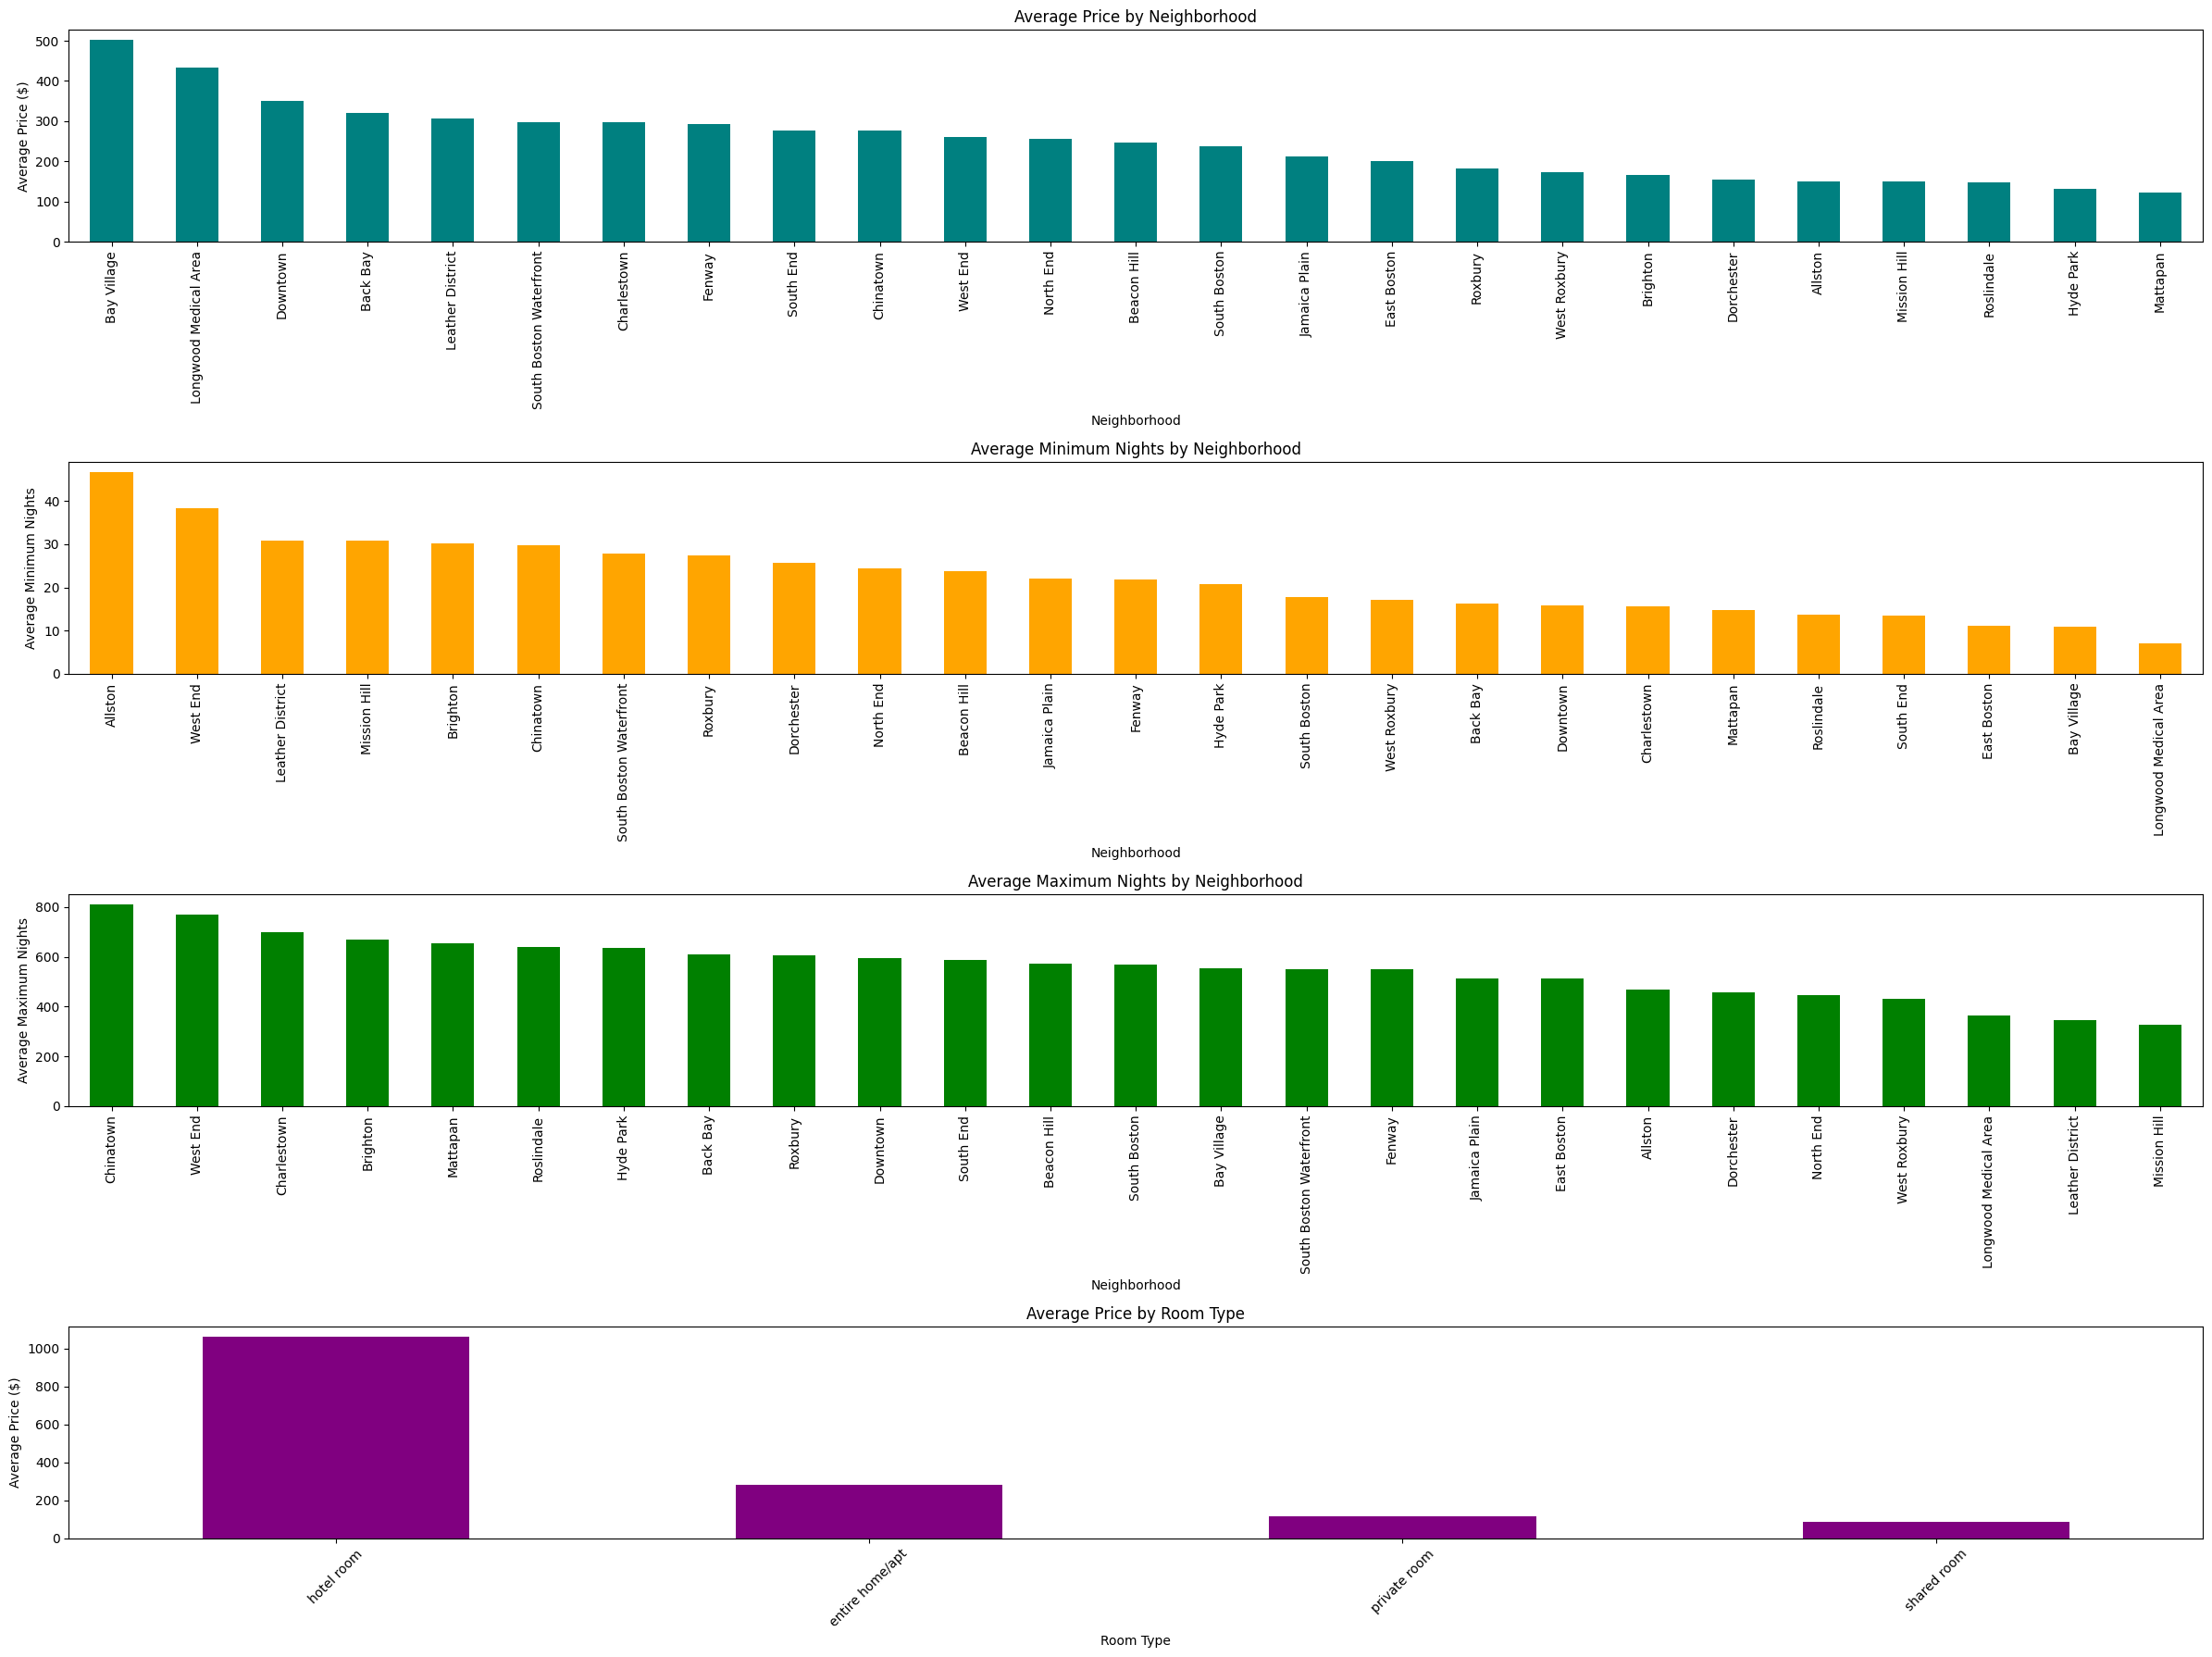

<Figure size 1600x800 with 0 Axes>

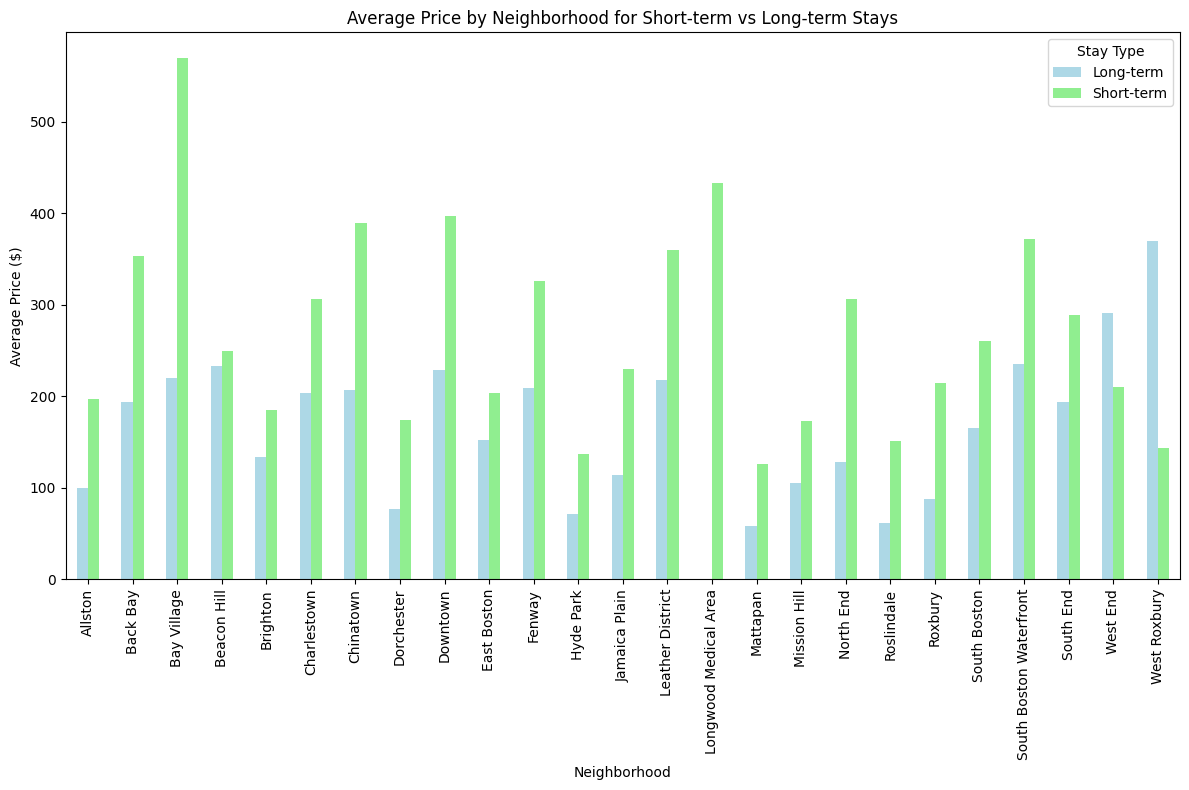

<Figure size 800x600 with 0 Axes>

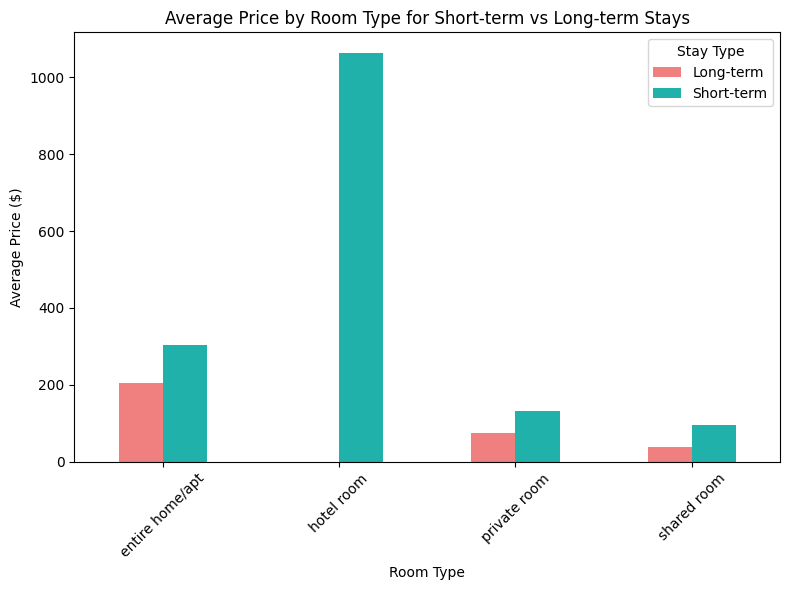

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

listings['stay_type'] = listings['minimum_nights'].apply(lambda x: 'Long-term' if x > 30 else 'Short-term')

# Extracting relevant columns for price analysis: price, neighbourhood_cleansed, room_type, and minimum_nights
price_analysis_columns = ['price', 'neighbourhood_cleansed', 'room_type', 'minimum_nights', 'maximum_nights', 'stay_type']

# Creating the price_analysis_data DataFrame
price_analysis_data = listings[price_analysis_columns].dropna()

# Calculating average price per neighborhood
avg_price_neighbourhood = price_analysis_data.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

# Calculating average minimum/maximum nights per neighborhood (to understand short-term vs long-term stays)
avg_minimum_nights_neighbourhood = price_analysis_data.groupby('neighbourhood_cleansed')['minimum_nights'].mean().sort_values(ascending=False)
avg_maximum_nights_neighbourhood = price_analysis_data.groupby('neighbourhood_cleansed')['maximum_nights'].mean().sort_values(ascending=False)

# Calculating average price per room type
avg_price_room_type = price_analysis_data.groupby('room_type')['price'].mean().sort_values(ascending=False)

# Calculate average price for short-term and long-term stays by neighborhood
avg_price_neighbourhood_stay_type = price_analysis_data.groupby(['neighbourhood_cleansed', 'stay_type'])['price'].mean().unstack().fillna(0)

# Calculate average price for short-term and long-term stays by room type
avg_price_room_type_stay_type = price_analysis_data.groupby(['room_type', 'stay_type'])['price'].mean().unstack().fillna(0)

# Displaying the results
print("Average Price by Neighborhood:")
print(avg_price_neighbourhood)

print("\nAverage Minimum Nights by Neighborhood:")
print(avg_minimum_nights_neighbourhood)

print("\nAverage Maximum Nights by Neighborhood:")
print(avg_maximum_nights_neighbourhood)

print("\nAverage Price by Room Type:")
print(avg_price_room_type)

print("\nAverage Price by Neighborhood and Stay Type:")
print(avg_price_neighbourhood_stay_type)

print("\nAverage Price by Room Type and Stay Type:")
print(avg_price_room_type_stay_type)

# Plotting price and minimum nights distributions across neighborhoods and room types
plt.figure(figsize=(24, 18))

# Average price by neighborhood
plt.subplot(4, 1, 1)
avg_price_neighbourhood.plot(kind='bar', color='teal')
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)

# Average minimum nights by neighborhood
plt.subplot(4, 1, 2)
avg_minimum_nights_neighbourhood.plot(kind='bar', color='orange')
plt.title('Average Minimum Nights by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Minimum Nights')
plt.xticks(rotation=90)

# Average maximum nights by neighborhood
plt.subplot(4, 1, 3)
avg_maximum_nights_neighbourhood.plot(kind='bar', color='green')
plt.title('Average Maximum Nights by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Maximum Nights')
plt.xticks(rotation=90)

# Average price by room type
plt.subplot(4, 1, 4)
avg_price_room_type.plot(kind='bar', color='purple')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plotting average price by neighborhood for short-term and long-term stays
plt.figure(figsize=(16, 8))

# Average price by neighborhood for short-term and long-term stays
avg_price_neighbourhood_stay_type.plot(kind='bar', stacked=False, color=['lightblue', 'lightgreen'], figsize=(12, 8))
plt.title('Average Price by Neighborhood for Short-term vs Long-term Stays')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.legend(title='Stay Type')

plt.tight_layout()
plt.show()

# Plotting average price by room type for short-term and long-term stays
plt.figure(figsize=(8, 6))

# Average price by room type for short-term and long-term stays
avg_price_room_type_stay_type.plot(kind='bar', stacked=False, color=['lightcoral', 'lightseagreen'], figsize=(8, 6))
plt.title('Average Price by Room Type for Short-term vs Long-term Stays')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Stay Type')

plt.tight_layout()
plt.show()

# 5. Neighborhood Comparison

Compare the average review_scores_rating across different neighborhoods. Determine if certain neighborhoods have consistently higher ratings, which could indicate better or worse guest experiences.

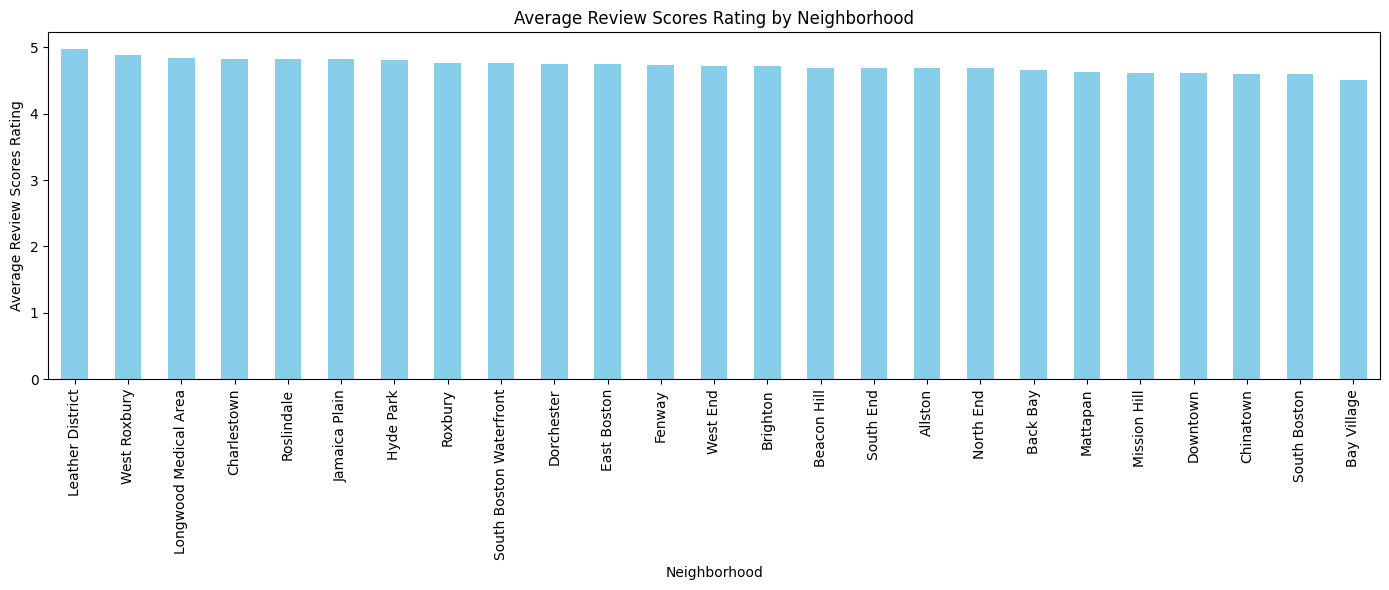

Average Review Scores Rating by Neighborhood:
neighbourhood_cleansed
Leather District           4.976667
West Roxbury               4.884062
Longwood Medical Area      4.837778
Charlestown                4.829595
Roslindale                 4.823457
Jamaica Plain              4.821421
Hyde Park                  4.811803
Roxbury                    4.763158
South Boston Waterfront    4.758889
Dorchester                 4.745890
East Boston                4.741304
Fenway                     4.736667
West End                   4.722286
Brighton                   4.718173
Beacon Hill                4.693806
South End                  4.692590
Allston                    4.691964
North End                  4.686180
Back Bay                   4.665086
Mattapan                   4.623871
Mission Hill               4.620213
Downtown                   4.612024
Chinatown                  4.603256
South Boston               4.599936
Bay Village                4.501731
Name: review_scores_rating, dty

In [65]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculating average review_scores_rating per neighborhood
avg_rating_neighbourhood = listings.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().dropna().sort_values(ascending=False)

# Plotting the average review_scores_rating across neighborhoods
plt.figure(figsize=(14, 6))
avg_rating_neighbourhood.plot(kind='bar', color='skyblue')
plt.title('Average Review Scores Rating by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Review Scores Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the average review scores rating per neighborhood
print("Average Review Scores Rating by Neighborhood:")
print(avg_rating_neighbourhood)

# 6. Outlier Detection

Identify outliers in the dataset, particularly in price, minimum_nights, and review_scores_rating.

# Detecting outliers using IQR

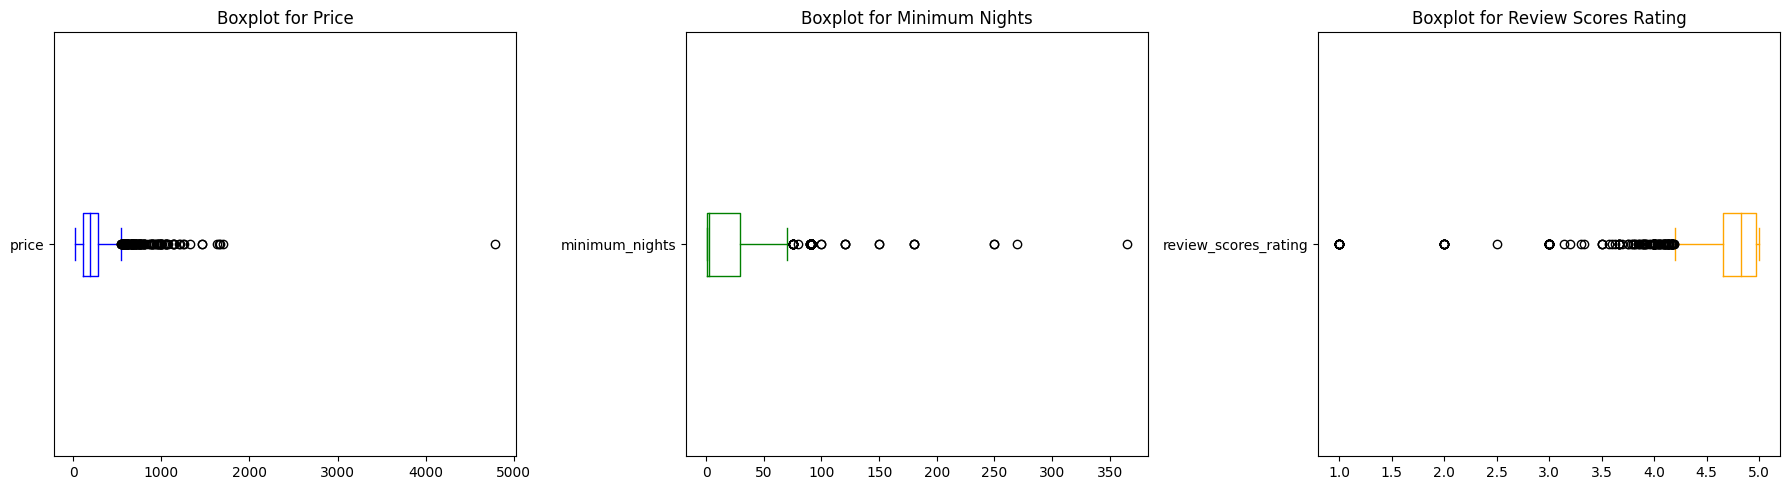

Number of price outliers: 241
       price
61     571.0
86     985.0
100    571.0
112    650.0
187    600.0
...      ...
4285  1000.0
4297   800.0
4301   975.0
4306   560.0
4313   609.0

[241 rows x 1 columns]

Number of minimum nights outliers: 716
      minimum_nights
3                 91
4                 91
14                91
21                91
32                91
...              ...
4238              91
4254              91
4273              91
4283              91
4295              91

[716 rows x 1 columns]

Number of review scores rating outliers: 225
      review_scores_rating
6                     4.00
87                    4.00
166                   4.00
219                   3.71
221                   3.67
...                    ...
4256                  4.00
4262                  1.00
4263                  4.00
4269                  4.00
4275                  1.00

[225 rows x 1 columns]


In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns to check for outliers
outlier_columns = ['price', 'minimum_nights', 'review_scores_rating']

# Function to detect outliers using IQR
def detect_outliers_iqr(listings_1, column):
    Q1 = listings[column].quantile(0.25)
    Q3 = listings[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = listings[(listings[column] < lower_bound) | (listings[column] > upper_bound)]
    return outliers

# Detecting outliers for each column
outliers_price = detect_outliers_iqr(listings_1, 'price')
outliers_minimum_nights = detect_outliers_iqr(listings_1, 'minimum_nights')
outliers_review_scores = detect_outliers_iqr(listings_1, 'review_scores_rating')

# Visualizing outliers with boxplots
plt.figure(figsize=(18, 5))

# Boxplot for price
plt.subplot(1, 3, 1)
listings_1['price'].plot(kind='box', vert=False, color='blue')
plt.title('Boxplot for Price')

# Boxplot for minimum nights
plt.subplot(1, 3, 2)
listings_1['minimum_nights'].plot(kind='box', vert=False, color='green')
plt.title('Boxplot for Minimum Nights')

# Boxplot for review scores rating
plt.subplot(1, 3, 3)
listings_1['review_scores_rating'].plot(kind='box', vert=False, color='orange')
plt.title('Boxplot for Review Scores Rating')

plt.tight_layout()
plt.show()

# Display the outliers
print(f"Number of price outliers: {len(outliers_price)}")
print(outliers_price[['price']])

print(f"\nNumber of minimum nights outliers: {len(outliers_minimum_nights)}")
print(outliers_minimum_nights[['minimum_nights']])

print(f"\nNumber of review scores rating outliers: {len(outliers_review_scores)}")
print(outliers_review_scores[['review_scores_rating']])

# Outlier Detection using Z Score Technique  

Number of outliers detected: 148
       price  minimum_nights  review_scores_rating
33       NaN             180                  5.00
86     985.0               5                  4.96
111    150.0             365                  4.87
180     99.0             250                  4.89
216   1071.0               7                  4.97
...      ...             ...                   ...
4246   236.0               2                  1.00
4262    73.0               2                  1.00
4275   325.0               1                  1.00
4285  1000.0               1                   NaN
4301   975.0               1                  5.00

[148 rows x 3 columns]


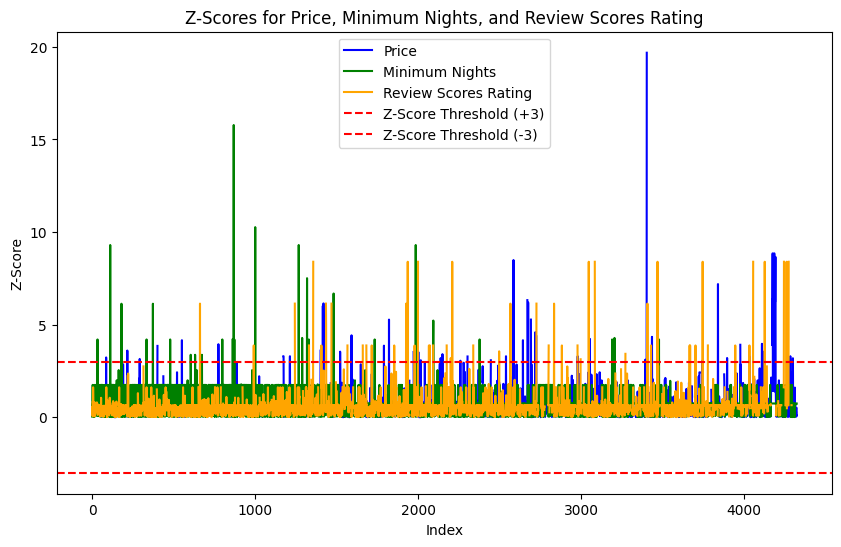

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of columns to check for outliers
outlier_columns = ['price', 'minimum_nights', 'review_scores_rating']

# Standardizing (z-scoring) the data for outlier detection
z_scores = np.abs((listings[outlier_columns] - listings[outlier_columns].mean()) / listings[outlier_columns].std())

# Detecting outliers with a z-score threshold of 3
outliers = listings[(z_scores > 3).any(axis=1)]

# Checking for outliers in specific columns
print(f"Number of outliers detected: {len(outliers)}")
print(outliers[outlier_columns])

# Plotting the z-scores with colors for each property
plt.figure(figsize=(10, 6))

# Plot each property with a different color
plt.plot(z_scores['price'], label='Price', color='blue')
plt.plot(z_scores['minimum_nights'], label='Minimum Nights', color='green')
plt.plot(z_scores['review_scores_rating'], label='Review Scores Rating', color='orange')

# Add z-score threshold line at 3 and -3
plt.axhline(y=3, color='red', linestyle='--', label='Z-Score Threshold (+3)')
plt.axhline(y=-3, color='red', linestyle='--', label='Z-Score Threshold (-3)')

# Add labels and title
plt.title('Z-Scores for Price, Minimum Nights, and Review Scores Rating')
plt.xlabel('Index')
plt.ylabel('Z-Score')

# Add legend to show which color represents which property
plt.legend()

# Show the plot
plt.show()
